# PlotCorr: Plotting Correlations Between SN and Host Properties

For the first step in figuring out possible correlations between empirical SN and Host galaxy properties, this code will produce plots comparing various properties. These include:

* SN peak magnitude and SALT color and stretch parameters
* Host galaxy colors, offset from host nucleus, surface brightness profile, and surface brightness at the location of the SN

This code assumes access to the file_parse.py, plot_funcs.py, calc_kcor.py, and calc_dmod.py packages in this repository.

Start by importing necessary packages:

In [1]:
%matplotlib inline
import numpy as np
import urllib
import os
import matplotlib
from matplotlib import pyplot as plt
from plot_funcs import *

Download the master data files, if we don't already have them. Currently, they are stored in Tom's public Dropbox folder.

In [2]:
targdir = 'data_files'
if not os.path.isdir(targdir):
    os.mkdir(targdir)

filenames = ('sdss_master.csv','snls_master.csv')

remotedir = 'https://dl.dropboxusercontent.com/u/5900205/empiriciSN_data/'

for filename in filenames:
    path = os.path.join(targdir, filename)
    url = os.path.join(remotedir, filename)
    
    #Always download the files, in case something has been updated.
    urllib.urlretrieve(url, path)

Read in the lines from each file.

In [3]:
infile = open('data_files/sdss_master.csv','r')
sdss_lines = infile.readlines()
infile.close()

infile = open('data_files/snls_master.csv','r')
snls_lines = infile.readlines()
infile.close()

In all plots, SDSS SNe are displayed in blue and SNLS SNe are displayed in red. I am only including those SNLS SNe which had hosts that were also detected and modeled in SDSS, to keep the magnitudes and modeling consistent. For each SN, I show the SALT2 x0, x1, and c values, as well as the log of the separation from the host nucleus in units of the r-band effective radius.

First, plot SN properties vs. Host colors. All host mags have been K-corrected using [kcorrect](http://cosmo.nyu.edu/mb144/kcorrect/v3_2-index.html).

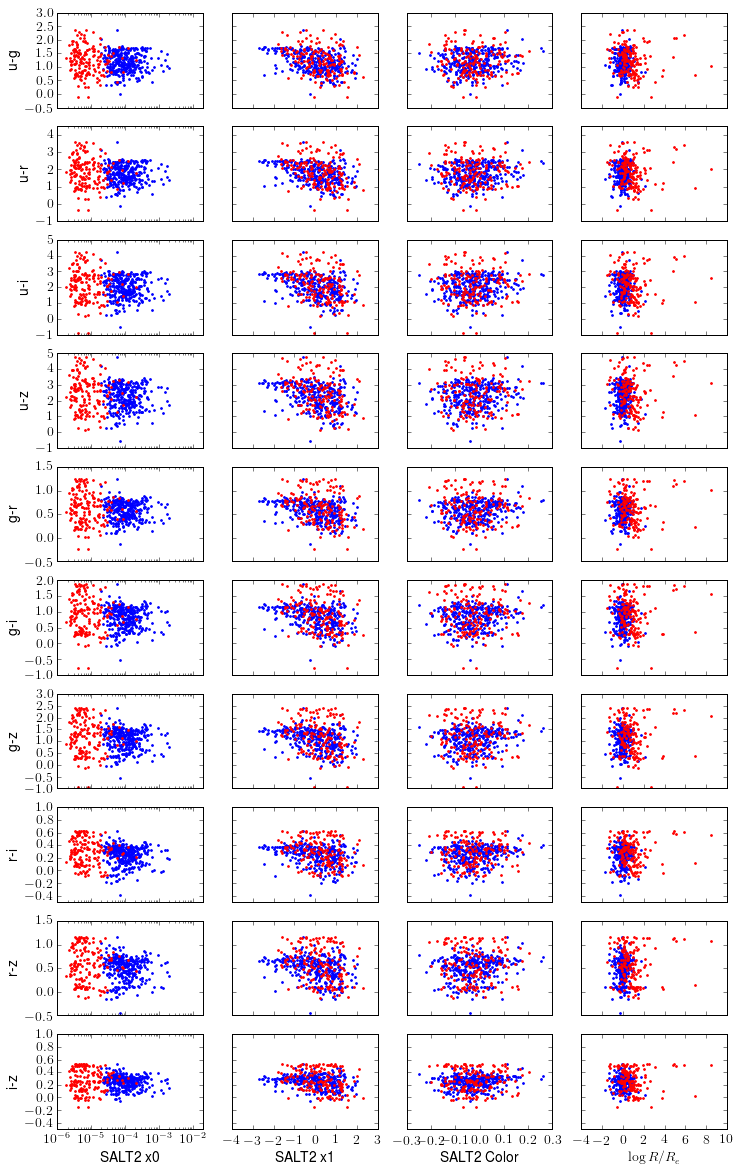

In [4]:
plot_color(sdss_lines,snls_lines)

Next plot SN properties vs. offset from Host, in arcseconds, kpc, and log(R/Re). Distance moduli are calculated using the calc_dmod.py package. Note that x0 captures an apparent brightness, so the trend in x0 may not be particularly informative. (The SNLS ones are generally farther and more separated from the host than the SDSS ones, and so seeing higher separations for lower x0 is not particularly surprising.)

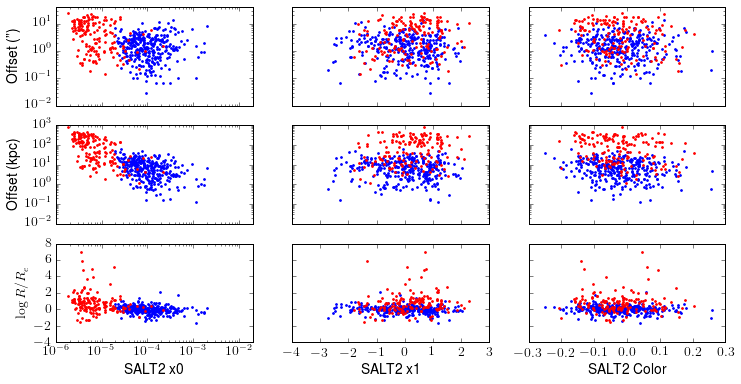

In [5]:
plot_sep(sdss_lines,snls_lines)

Next, plot SN properties vs. surface brightness at the location of the SN. SDSS exponential and de Vaucouleurs model fits were used to determine the profiles of the host galaxies. (The profile with higher likelihood from the SDSS model fit in the r-band was used to determine whether to use an exponential or de Vaucouleurs profile to calculate the surface brightness, as this was the same method used to determine which model to use to model the galaxy magnitudes). 

Surface brightness at the location of the SN is given in mags/arcsec$^2$. Surface brightness was calculated using the k-corrected fluxes from [kcorrect](http://cosmo.nyu.edu/mb144/kcorrect/v3_2-index.html).

Exponential and de Vaucouleurs surface brightnesses are shown separately, and each band is shown separately.

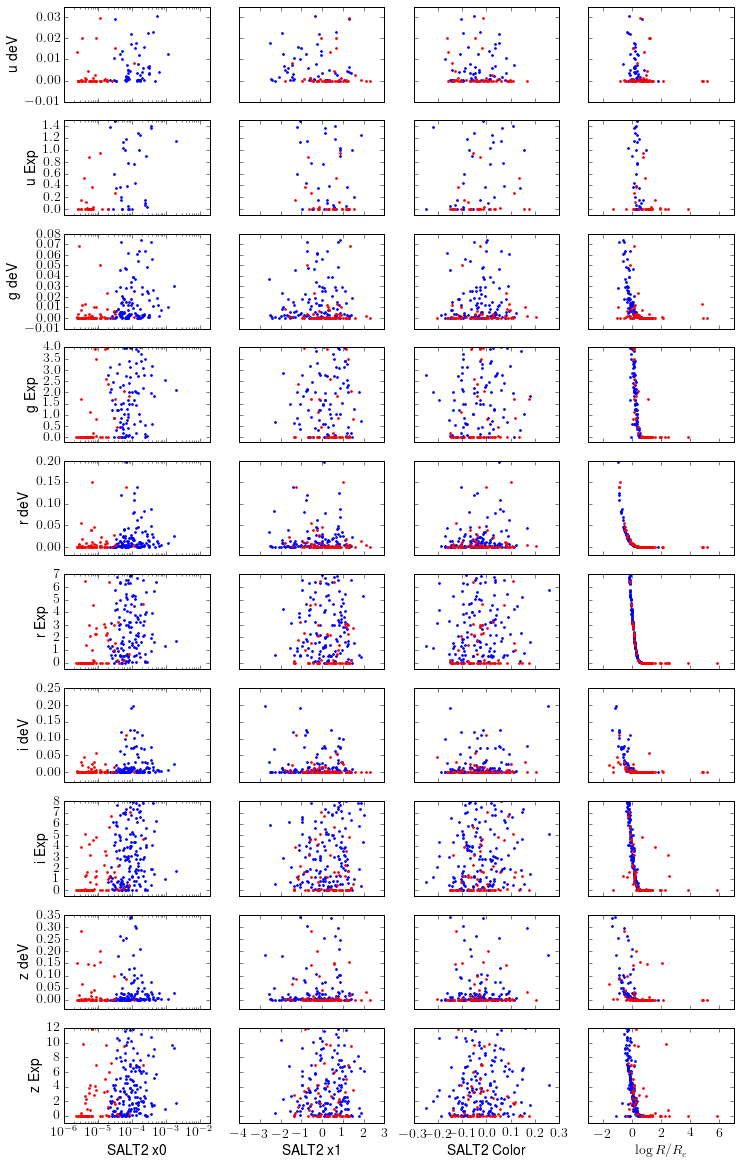

In [6]:
plot_prof(sdss_lines,snls_lines)

Finally, plot the local color at the location of the SN. Here I used the surface brightness in each band and calculated a 2 arcsec aperture flux, which was then converted into a magnitude and used for color calculations. The aperture can be changed easily, so this can be redone if needed.

Like above, SNe with Exponential and deVaucouleurs hosts are plotted separately. There are a few cases where the surface brightness calculated to zero, or close to it, causing some issues with the magnitude calculation. These have not been plotted.

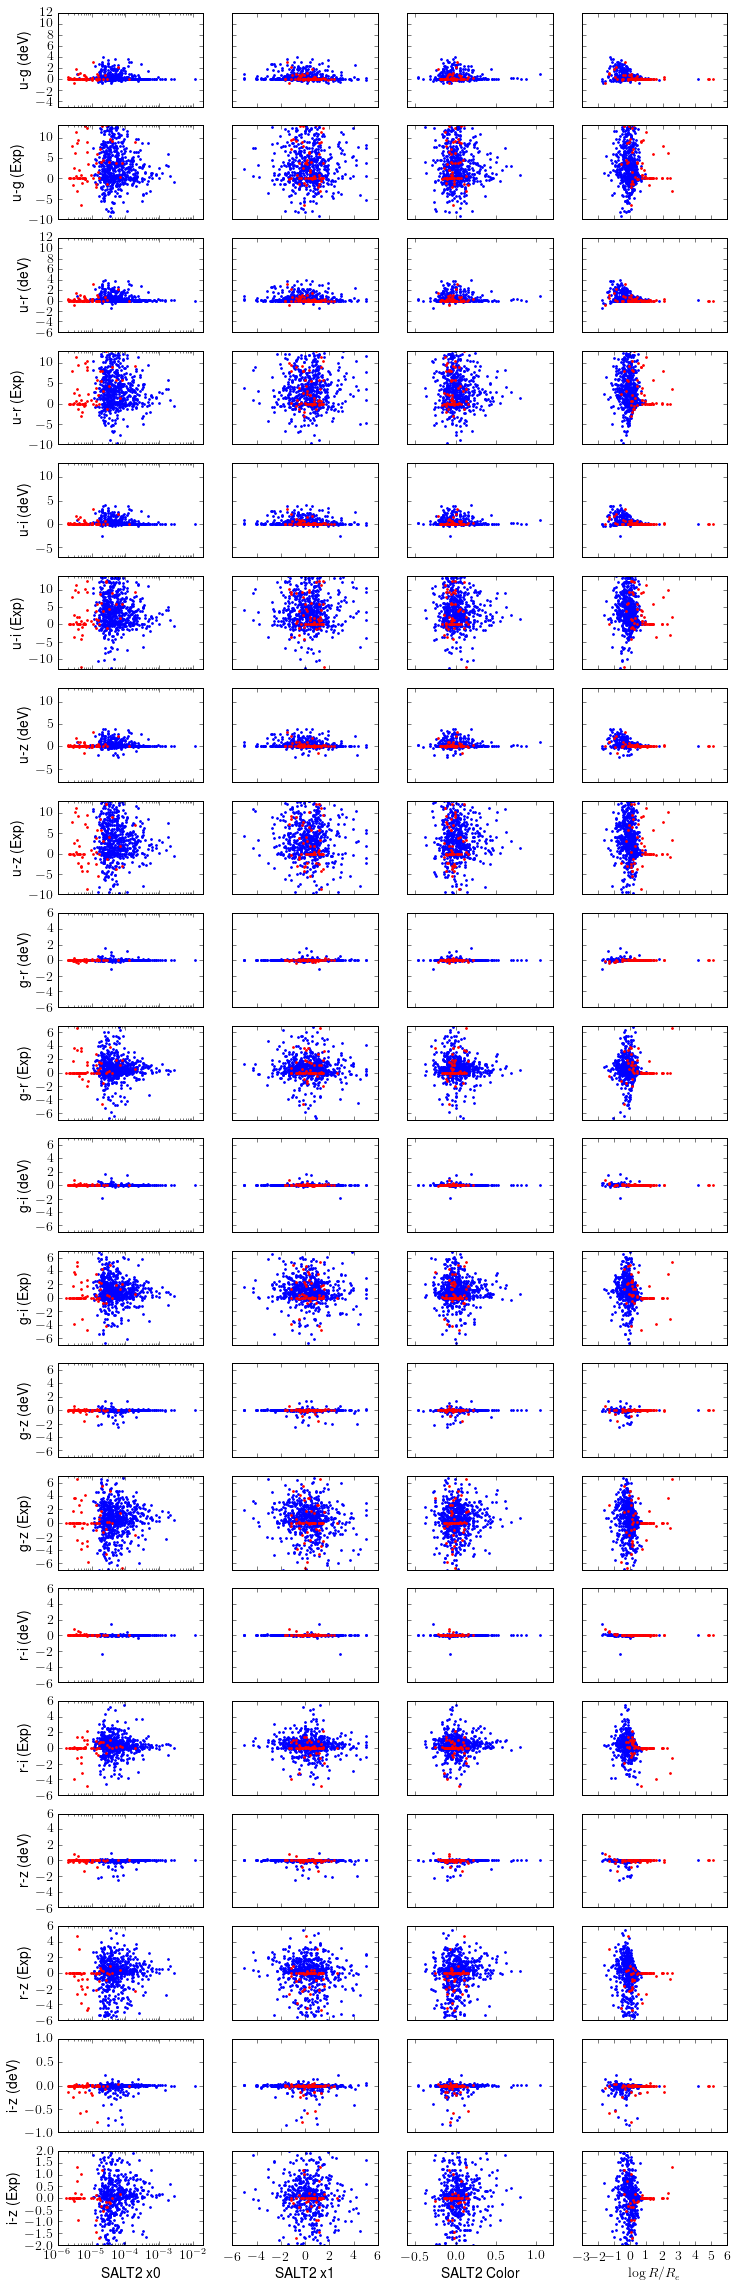

In [7]:
plot_loc_color(sdss_lines,snls_lines)